<a href="https://colab.research.google.com/github/Samarth-Kanodia/CIFAR-10-Classification-CNN-/blob/main/CIFAR_10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:

CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
<ul>
  <li>
Airplanes
  </li>
  <li>
Cars
  </li>
  <li>
Birds
  </li>
  <li>
Cats
  </li>
  <li>
Deer
  </li>
  <li>
Dogs
  </li>
  <li>
Frogs
  </li>
  <li>
Horses
  </li>
  <li>
Ships
  </li>
  <li>
Trucks
  </li>
</ul>

The dataset stands for the Canadian Institute For Advanced Research (CIFAR).

CIFAR-10 is widely used for machine learning and computer vision applications.

The dataset consists of 60,000 32x32 color images and 6,000 images of each class.

Images have low resolution (32x32).

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# importing the dataset
from keras.datasets import cifar10

In [ ]:
# loading the dataset and making the train and the test set
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# displaying the dimensions of train and test sets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
n_train = len(X_train)
n_train

50000

In [ ]:
# making a list of the class names
labels = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

<ipython-input-8-ec8c98a41f66>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


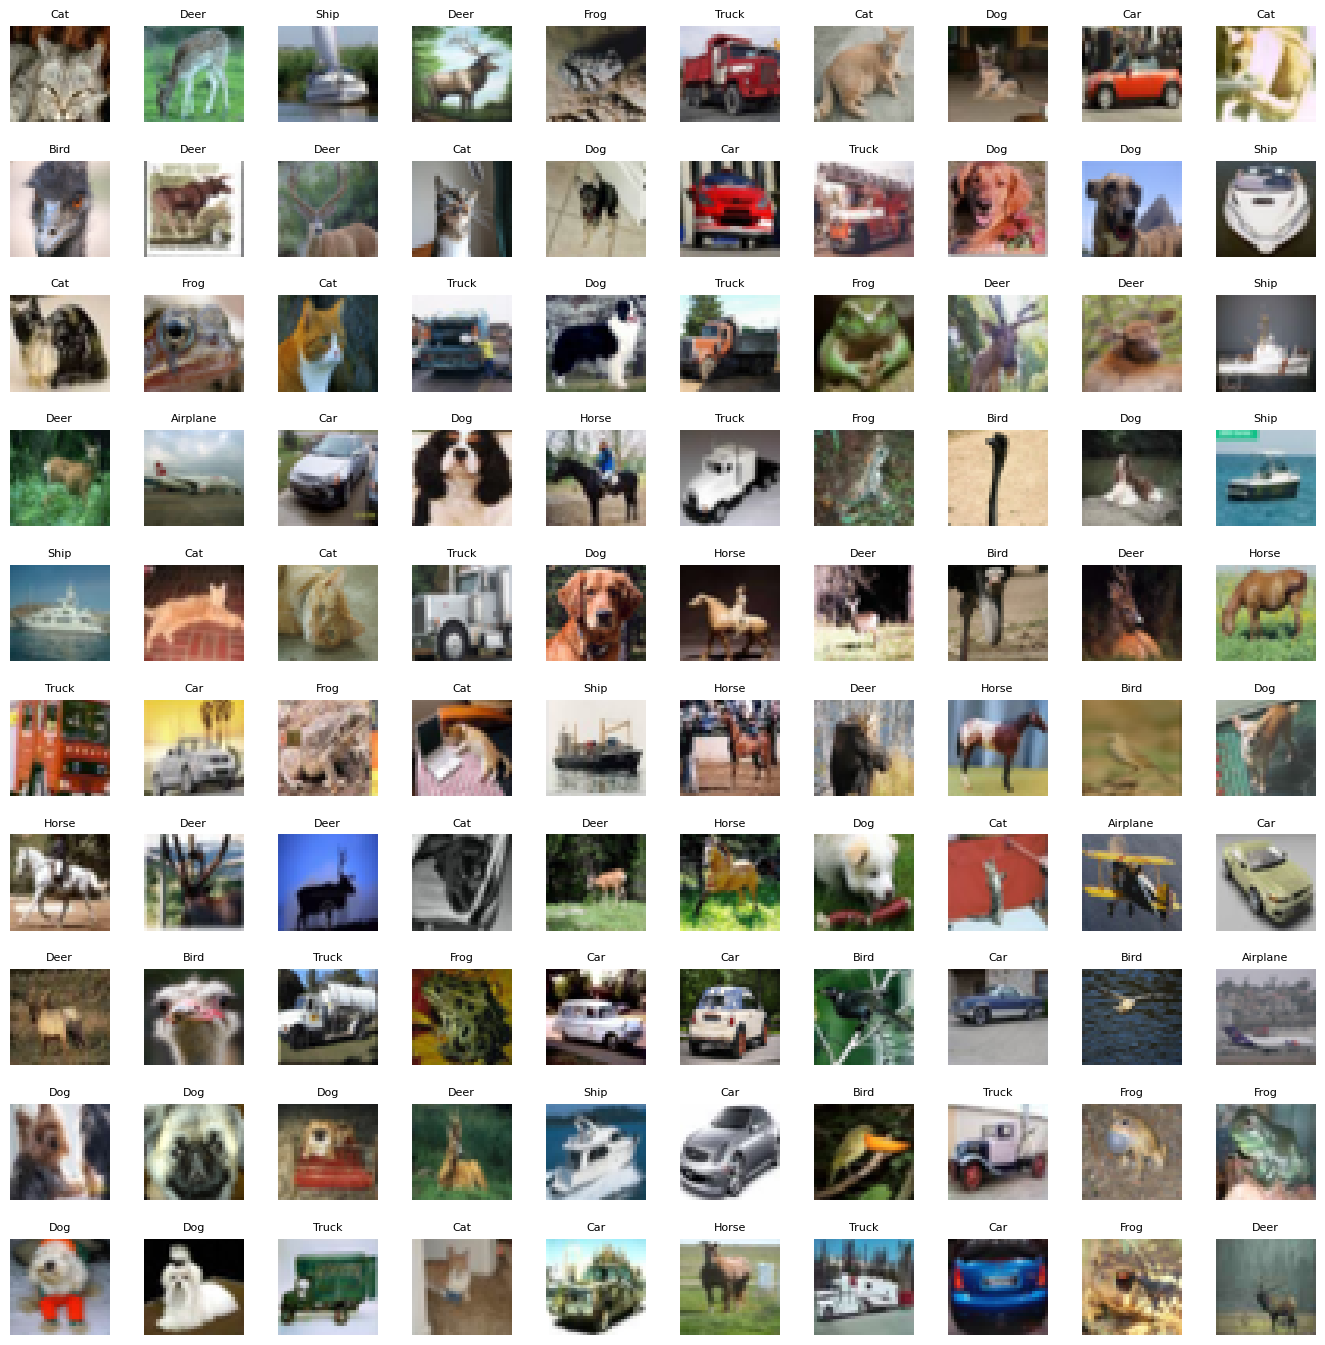

In [ ]:
# displaying random images from the X_train with their correct labels from y_train
l_grid = 10
w_grid = 10

fig, axes = plt.subplots(l_grid, w_grid, figsize = (17,17)) # "axes" are individual subplots within the entire "fig" canvas
axes = axes.ravel() # flatten the 2D array into 1D array for easier iteration

for i in np.arange(0, l_grid * w_grid):
  index = np.random.randint(0, n_train)
  axes[i].imshow(X_train[index, 1:])
  label_index = int(y_train[index])
  axes[i].set_title(labels[label_index], fontsize = 8)
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

## Visualizing the Distribution of Classes

In [ ]:
classes, counts = np.unique(y_train, return_counts = True)

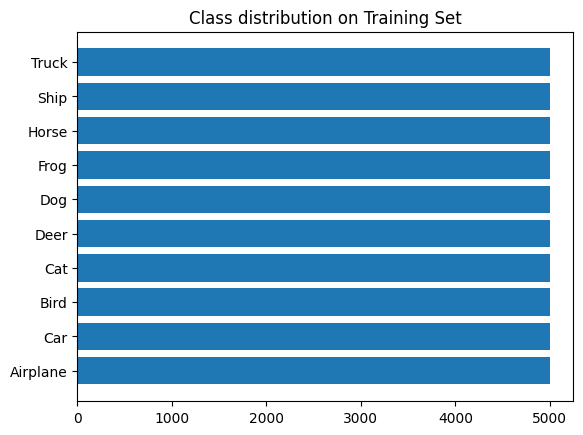

In [ ]:
plt.barh(labels, counts)
plt.title("Class distribution on Training Set")
plt.show()

The above bar chart shows that the classes are equally distributed in the training set

In [ ]:
classes, counts = np.unique(y_test, return_counts = True)

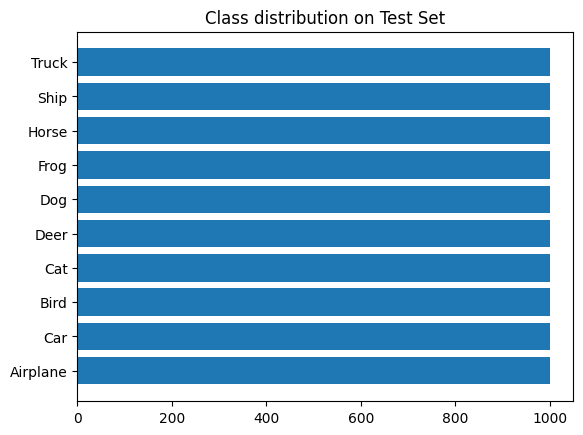

In [ ]:
plt.barh(labels, counts)
plt.title("Class distribution on Test Set")
plt.show()

The above bar chart shows that the classes are equally distributed in the test set

In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

##Data Preprocessing

In [ ]:
# scaling
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
# transforming the target variable into one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

## Building the CNN Model

In [ ]:
# importing Sequential from keras
from keras.models import Sequential

In [ ]:
# making an instance "cnn" of the Sequential class
cnn = Sequential()

In [ ]:
# importing necessary layers from keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [ ]:
# making the first layer of CNN by adding the Convolutional and Pooling layers
""" Dropout layer helps in preventing overfitting by temporarily deactivating some of the neurons thereby,
focusing on the understanding of the pattern rather than memorizing the training dataset """
#Batch Normalization layer normalizes the activations of the previous layer thereby, stabilizing training and accelerating learning
cnn.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32, 32, 3), padding = 'same'))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# making the second layer of CNN in a similar fashion
cnn.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Dropout(0.3))

In [ ]:
# making the third layer of CNN in a similar fashion
cnn.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
cnn.add(BatchNormalization())
cnn.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Dropout(0.4))

In [ ]:
# adding the flattening layer
cnn.add(Flatten())

In [ ]:
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dropout(0.4))

In [ ]:
# making the output layer using Dense
cnn.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
# importing Adam optimizer
from keras.optimizers import Adam
optimizer = Adam(learning_rate = 0.001)

In [ ]:
# compiling the Convolutional Neural Network
cnn.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [ ]:
# summarising the model
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 551,466 (2.10 MB)

 Trainable params: 551,018 (2.10 MB)

 Non-trainable params: 448 (1.75 KB)

## Data Augmentation

In [ ]:
# creating augmented images from the training dataset for validation and hence prevention of overfitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 20, width_shift_range = 0.2, height_shift_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')
valid_data = datagen.flow(X_train_scaled, y_train_cat, 64)

### Regularization

In [ ]:
# importing Early Stopping to prevent overfitting
# Early Stopping prevents overfitting by stopping the training once the model's performance starts to degrade
# patience parameter decides the number of epochs to wait for improvement before stopping
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [ ]:
# ReduceLROnPlateau prevents stagnation of learning by increasing the learning rate if the progress is quick and decreasing it when the progress is slow
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 3, min_lr = 1e-5)

### Training

In [ ]:
# fitting the model to training dataset
cnn.fit(X_train_scaled, y_train_cat, batch_size = 64, epochs = 50, validation_data = valid_data, callbacks = [early_stop, reduce_lr], verbose = 1)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.2477 - loss: 2.0358

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 543s 688ms/step - accuracy: 0.2478 - loss: 2.0355 - val_accuracy: 0.3201 - val_loss: 1.9526 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 561s 688ms/step - accuracy: 0.4355 - loss: 1.5126 - val_accuracy: 0.4291 - val_loss: 1.5857 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 565s 692ms/step - accuracy: 0.5412 - loss: 1.2617 - val_accuracy: 0.4607 - val_loss: 1.5561 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 565s 695ms/step - accuracy: 0.6311 - loss: 1.0575 - val_accuracy: 0.4958 - val_loss: 1.5054 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 557s 690ms/step - accuracy: 0.6785 - loss: 0.9351 - val_accuracy: 0.5345 - val_loss: 1.3938 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 536s 685ms/step - accuracy: 0.7117 - loss: 0.8473 - val_accuracy: 0.5440 - val_loss: 1.3677 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 557s 678ms/step - accuracy: 0.7372 

In [ ]:
# predicting on the training dataset
y_pred_train = cnn.predict(X_train_scaled)
y_pred_train

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step


array([[1.54809371e-07, 1.46663268e-07, 3.94013012e-03, ...,
        9.08318907e-06, 1.29175987e-07, 2.86560180e-07],
       [5.10192741e-08, 4.44866964e-06, 1.31286561e-11, ...,
        2.45795079e-10, 9.61315862e-08, 9.99995291e-01],
       [1.48916105e-03, 3.33213340e-03, 2.02803517e-06, ...,
        7.86047985e-06, 2.75967759e-03, 9.92387414e-01],
       ...,
       [8.91558267e-03, 3.71030811e-03, 3.44370674e-05, ...,
        2.80099048e-05, 1.54949248e-01, 8.32265675e-01],
       [3.32508493e-10, 9.99395967e-01, 5.10283776e-16, ...,
        2.18370977e-19, 1.21839765e-08, 6.03916473e-04],
       [1.78093627e-01, 3.31112623e-01, 6.53590309e-04, ...,
        1.24074717e-03, 2.97951549e-02, 4.57179278e-01]], dtype=float32)

In [ ]:
y_pred_train = np.argmax(y_pred_train, axis = 1)
y_pred_train

In [ ]:
y_pred_train = y_pred_train.reshape(50000, 1)
y_pred_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [9]])

In [ ]:
# importing various evaluation techniques
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [ ]:
# checking the accuracy score on the training dataset
accuracy_score(y_train, y_pred_train)

0.90188

### Testing

In [ ]:
# making predictions on the test dataset
y_pred_arr = cnn.predict(X_test_scaled)
y_pred_arr

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 74ms/step


array([[2.19816947e-03, 3.60181002e-05, 2.73000412e-02, ...,
        1.33334100e-03, 3.29396036e-03, 2.67705382e-05],
       [4.76904312e-08, 8.68642019e-06, 1.05595654e-13, ...,
        1.30593310e-21, 9.99991238e-01, 2.10256967e-09],
       [1.92877615e-03, 1.37113011e-03, 4.09067115e-06, ...,
        6.95369484e-10, 9.96630311e-01, 6.38134079e-05],
       ...,
       [3.47487078e-12, 6.90697050e-15, 8.94789537e-06, ...,
        3.07017872e-05, 7.81483558e-12, 3.06391251e-13],
       [1.00564875e-01, 8.58359814e-01, 3.13067343e-03, ...,
        6.39709469e-05, 1.77394077e-02, 1.92204211e-02],
       [2.59677674e-12, 1.75301873e-17, 3.47052476e-09, ...,
        9.99866486e-01, 1.06917346e-17, 7.19265650e-15]], dtype=float32)

In [ ]:
# since each class gets some probability while making predictions, we need to choose the max among them for finally reporting the class
# therefore we make a null matrix similar to y_pred_arr to store 1 in case of max prediction and 0 elsewhere
y_pred_cat = np.zeros_like(y_pred_arr, dtype = int)

for i, row in enumerate(y_pred_arr):
    y_pred_cat[i] = (row == np.max(row)).astype(int)

y_pred_cat

In [ ]:
y_pred = np.argmax(y_pred_cat, axis = 1)
y_pred

In [ ]:
y_pred.shape

In [ ]:
y_pred = y_pred.reshape(10000, 1)
y_pred

In [ ]:
# stacking them side by side for comparison
compare = np.hstack((y_pred, y_test))
compare

## Evaluating the Model Performance

In [ ]:
# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[820,  14,  40,   8,  11,   2,  10,  10,  52,  33],
       [  4, 933,   1,   2,   1,   1,   4,   0,  11,  43],
       [ 40,   0, 730,  19,  70,  37,  82,  14,   4,   4],
       [ 10,   1,  53, 591,  49, 161,  96,  18,   8,  13],
       [  6,   0,  29,  14, 857,  18,  40,  32,   2,   2],
       [  5,   0,  31,  91,  35, 784,  21,  30,   2,   1],
       [  3,   0,  11,  15,  13,  13, 937,   4,   2,   2],
       [  8,   0,  14,  13,  37,  37,  10, 874,   3,   4],
       [ 25,  10,   6,   7,   2,   1,   5,   1, 930,  13],
       [ 11,  42,   4,   5,   1,   1,   4,   1,  13, 918]])

### Visualizing the Predictions

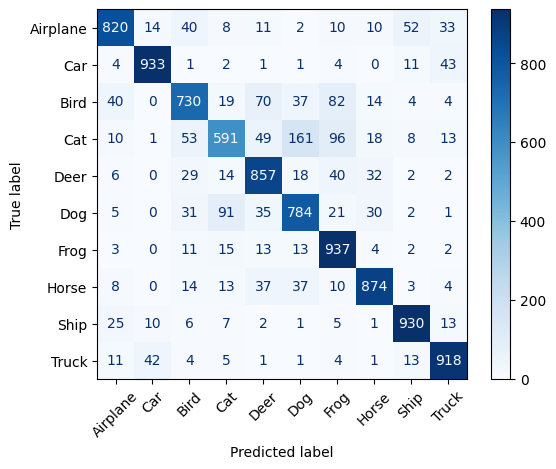

In [ ]:
# plotting the confusion matrix for better analysis
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = plt.cm.Blues)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# checking the accuracy score
accuracy_score(y_test, y_pred)

0.8374

In [ ]:
# making the classification report
classification_report(y_test, y_pred, target_names = labels)

'              precision    recall  f1-score   support\n\n    Airplane       0.88      0.82      0.85      1000\n         Car       0.93      0.93      0.93      1000\n        Bird       0.79      0.73      0.76      1000\n         Cat       0.77      0.59      0.67      1000\n        Deer       0.80      0.86      0.83      1000\n         Dog       0.74      0.78      0.76      1000\n        Frog       0.78      0.94      0.85      1000\n       Horse       0.89      0.87      0.88      1000\n        Ship       0.91      0.93      0.92      1000\n       Truck       0.89      0.92      0.90      1000\n\n    accuracy                           0.84     10000\n   macro avg       0.84      0.84      0.84     10000\nweighted avg       0.84      0.84      0.84     10000\n'

'              precision    recall  f1-score   support\n\n    Airplane       0.88      0.82      0.85      1000\n         Car       0.93      0.93      0.93      1000\n        Bird       0.79      0.73      0.76      1000\n         Cat       0.77      0.59      0.67      1000\n        Deer       0.80      0.86      0.83      1000\n         Dog       0.74      0.78      0.76      1000\n        Frog       0.78      0.94      0.85      1000\n       Horse       0.89      0.87      0.88      1000\n        Ship       0.91      0.93      0.92      1000\n       Truck       0.89      0.92      0.90      1000\n\n    accuracy                           0.84     10000\n   macro avg       0.84      0.84      0.84     10000\nweighted avg       0.84      0.84      0.84     10000\n'

In [ ]:
cnn.save("CNN_CIFAR-10.keras", include_optimizer = True)

## Conclusion:

<ul>
  <li>
    Convolutional Neural Network is successfully applied on CIFAR-10 dataset for classification purposes.
  </li>
  <li>
    The Training Accuracy reported is 90.188% while the Testing Accuracy reported is 83.74%.
  </li>
</ul>
